In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import h5py
from load_quilt_data import load_data
import sklearn.metrics as metrics
from visualise_data import plot_confusion_matrix
from pylab import *
import numpy as np
import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Convolution1D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras import metrics
from keras.activations import relu, sigmoid, softmax
from keras import backend as K
from keras.models import load_model
from keras import optimizers
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [4]:
from pylab import *
import numpy as np

def plot_data(training_loss, val_loss, epochs):

    plt.figure(figsize=(10, 4))
    x_ax = np.arange(1, len(val_loss)+1,1)
    #import pdb; pdb.set_trace()
    plt.plot(x_ax, val_loss, 'bo', label='Test accuracy')
    plt.plot(x_ax, training_loss, label='Training accuracy')
    plt.legend()
    plt.xlabel('Nr. of epochs')
    plt.ylabel('MAE')
    plt.title('Training Performance 1D Convolution after '+ str(len(val_loss))+' epochs, '+ 'error: '+ str(val_loss[-1]))
    plt.show()

In [5]:
def plot_wrongs():
    
    model = load_model('D:\ParkHere\Keras_models\model_'+'regression'+'.h5')
    layer_output = model.predict(x_test, verbose = 0)
    
    
    y_true_labels = y_test  # only necessary if output has one-hot-encoding, shape=(n_samples)
    rounded_y = np.round(layer_output)
    y_true = (np.expand_dims(y_test, axis = 2))
    #print('pred: '+ str(rounded_y), 'true: '+ str(y_true), y_true-rounded_y )
    
    
    y_correct = y_true == rounded_y
    #print(y_correct)
    print(sum(y_correct)/len(y_correct))

    



In [6]:
plot_wrongs()

C:\Users\Lisa\Anaconda3\envs\parkhere_ML\lib\site-packages\ipykernel\__main__.py:9: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


0.8725099601593626


In [9]:

class Net(object):


    def __init__(self, batch_size, epochs, optimizer, activation, minDelta, patience ):


        self.batch_size = batch_size
        self.epochs = epochs
        self.optimizer = optimizer
        self.activation = activation
        self.minDelta = minDelta
        self.patience = patience

    ##### Creation of the model
    def createModel(self):
        model = Sequential()
        # for the input shape keras ignores first dimension (batch size)
        model.add(Convolution1D(filters=10, kernel_size=5, activation=self.activation, padding='same', input_shape=(400, 4))) 
        model.add(MaxPooling1D())
        model.add(BatchNormalization())
        model.add(Convolution1D(filters=20, kernel_size=5, activation=self.activation, padding='same', input_shape=(400, 4))) 
        model.add(MaxPooling1D())
        model.add(BatchNormalization())
        model.add(Convolution1D(filters=40, kernel_size=5, activation=self.activation, padding='same', input_shape=(400, 4))) 
        model.add(MaxPooling1D())
        model.add(BatchNormalization())
        model.add(Flatten())
        model.add(Dense(30))
        model.add(Dense(1))

        model.summary()
        return(model)

    ##### Execution/Training of the model
    def exeModel(self, x_train, x_test, y_train, y_test):
        model = self.createModel()
        esCallBack = keras.callbacks.EarlyStopping(min_delta=self.minDelta, patience=self.patience, restore_best_weights = True)

        model.compile(loss='mean_absolute_error',
                      optimizer= self.optimizer)
        history = model.fit(x_train, y_train,
                            batch_size=self.batch_size,
                            epochs=self.epochs,
                            verbose=0,
                            validation_data=(x_test, y_test), callbacks = [esCallBack])

        model.save('D:\ParkHere\Keras_models\model_'+'regression'+'.h5')
        plot_data(history.history['loss'],history.history['val_loss'], self.epochs)
        return('Done')
        #return(history.history['loss'],history.history['val_loss'])
        
    def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 



 Activation: relu, Optimizer: <keras.optimizers.Adam object at 0x000001C14465F748>, Batch size: 2 Stops at 50 epochs, if no minimum improvement of: 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 400, 10)           210       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 200, 10)           0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 200, 10)           40        
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 200, 20)           1020      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 100, 20)           0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 100, 20)           80 

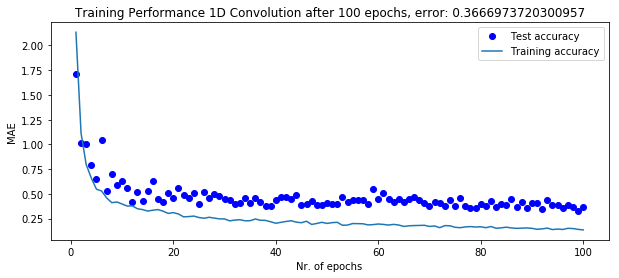

'Done'

In [14]:
##### Hyperparameters
import sklearn.metrics as metrics

sgd = optimizers.SGD(lr=0.01)
adam = keras.optimizers.Adam()
batchsize = 2
epochs = 100
optimizer = adam
activation = 'relu'
minDelta = 0
patience = 50

print ( ' Activation: '+activation+ ', Optimizer: '+str(optimizer)+
        ', Batch size: '+ str(batchsize)+' Stops at '+
       str(patience) + ' epochs, if no minimum improvement of: ' + str(minDelta))

Network = Net(batchsize, epochs, optimizer, activation, minDelta, patience)

Network.exeModel(x_train, x_test, y_train, y_test)
#plot_wrongs()

In [ ]:
wk_dir = os.path.realpath(__file__)
print(wk_dir)

In [15]:
def visualise_data(X, Y1, Y2, meta):
    X[10], Y1[10], Y2[10], meta[10]
    
    max_len = max([len(xi) for xi in X])
    print('Maximal sequence length: '+ str(max_len))
    print('Shape of input data: ', str(np.shape(X)))
    print('Histogram of sequence length: ')
    seq_lens = []

    for xi in X:
        seq_lens.append(len(xi))
    #matplotlib.pyplot.hist(seq_lens, bins= 100)
    
    abs_cars = []
    for yi in Y2:
        abs_cars.append(abs(yi))
    plt.figure(figsize=(15, 4))

    plt.hist(abs_cars, bins= 250 ) 
    plt.xlabel('Length of sequence')
    plt.ylabel('n')

In [12]:
def plot_sensor_data(x_data, wrong_y_pred, y_true):
    new_x = []
    for i in x_data:
        if -1 not in i:
            new_x.append(i)
    new_x = np.asarray(new_x)
    print(new_x)
    plt.plot(new_x[:,0], new_x[:,2], 'ro') 
    plt.ylabel('segment[1/3m]')
    plt.xlabel('time')
    plt.title('Time against segment of false prediction')
    plt.suptitle('Prediction: '+str(wrong_y_pred)+' True value: '+str(y_true), va = 'bottom')
    plt.show()
    

Maximal sequence length: 2997
Shape of input data:  (1328,)
Histogram of sequence length: 


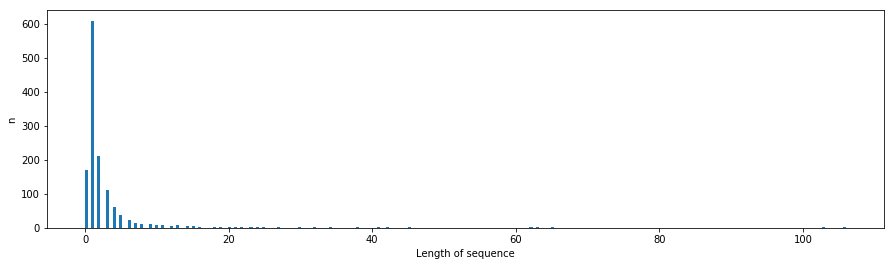

In [16]:
import matplotlib
visualise_data(X, Y1, Y2, meta)

In [ ]:
def get_wrong_pred_data(y_pred_labels, y_true_labels):

    wrong_preds = y_pred_labels-y_true_labels
    wrong_x = []
    wrong_y_preds = []
    y_trues = []
    for wp, x, y_pred, y_true in zip(wrong_preds, x_test, y_pred_labels, y_true_labels):
        if wp != 0:
            wrong_x.append(x)
            wrong_y_preds.append(y_pred)
            y_trues.append(y_true)
    return(wrong_x, wrong_y_preds,y_trues)